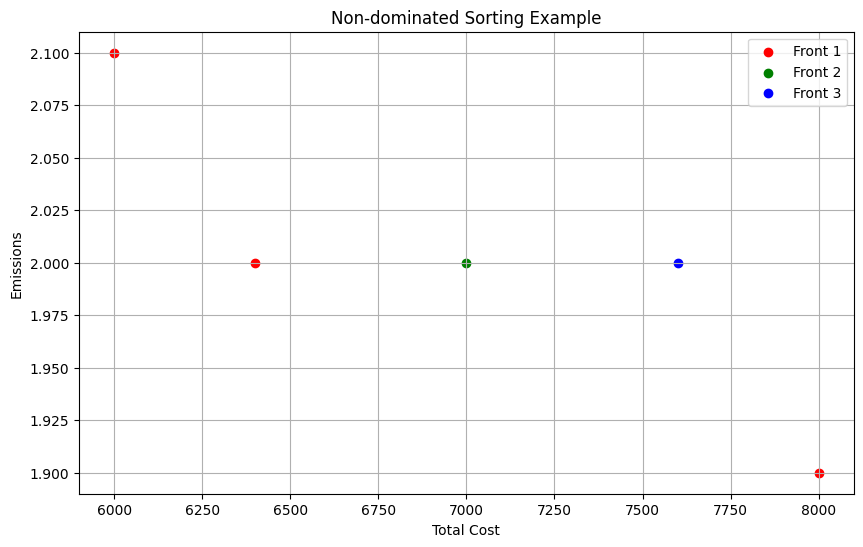

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definisikan fungsi tujuan
def cost(x1, x2):
    return 1000 * x1 + 200 * x2

def emissions(x1, x2):
    return 0.2 * x1 + 0.1 * x2

# Inisialisasi populasi
population = np.array([
    [5, 10],  # P1
    [6, 8],   # P2
    [4, 12],  # P3
    [7, 5],   # P4
    [3, 15]   # P5
])

# Evaluasi fungsi tujuan
costs = np.array([cost(ind[0], ind[1]) for ind in population])
emissions_values = np.array([emissions(ind[0], ind[1]) for ind in population])

# Hasil evaluasi
results = np.column_stack((costs, emissions_values))

# Non-dominated sorting
def non_dominated_sorting(results):
    num_individuals = results.shape[0]
    fronts = [[]]
    dominated_counts = np.zeros(num_individuals)
    dominates = [[] for _ in range(num_individuals)]

    for p in range(num_individuals):
        for q in range(num_individuals):
            if (results[p][0] < results[q][0] and results[p][1] <= results[q][1]) or \
               (results[p][0] <= results[q][0] and results[p][1] < results[q][1]):
                dominates[p].append(q)
            elif (results[p][0] > results[q][0] and results[p][1] >= results[q][1]) or \
                 (results[p][0] >= results[q][0] and results[p][1] > results[q][1]):
                dominated_counts[p] += 1

        if dominated_counts[p] == 0:
            fronts[0].append(p)

    i = 0
    while fronts[i]:
        next_front = []
        for p in fronts[i]:
            for q in dominates[p]:
                dominated_counts[q] -= 1
                if dominated_counts[q] == 0:
                    next_front.append(q)
        i += 1
        fronts.append(next_front)

    return fronts[:-1]

# Dapatkan front non-dominated
fronts = non_dominated_sorting(results)

# Visualisasi
colors = ['r', 'g', 'b', 'y', 'c']
plt.figure(figsize=(10, 6))
for i, front in enumerate(fronts):
    plt.scatter(results[front, 0], results[front, 1], color=colors[i], label=f'Front {i+1}')

# Tambahkan titik individu ke plot
# plt.scatter(costs, emissions_values, edgecolor='k', marker='o', label='Individuals')
plt.title('Non-dominated Sorting Example')
plt.xlabel('Total Cost')
plt.ylabel('Emissions')
plt.grid()
plt.legend()
plt.show()
